In [55]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [56]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [57]:
len(X_train)

60000

In [58]:
len(X_test)

10000

In [59]:
X_train[0].shape


(28, 28)

In [60]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

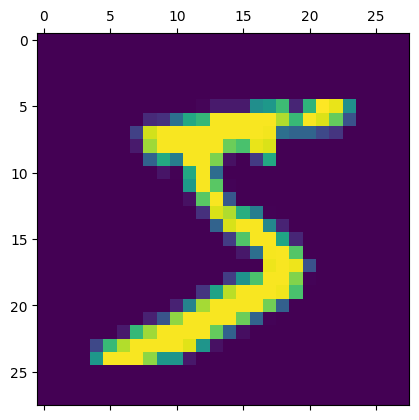

In [61]:
plt.matshow(X_train[0])

In [62]:
y_train[0]

5

In [63]:
y_train[:5]


array([5, 0, 4, 1, 9], dtype=uint8)

flattening the dataset

In [64]:
X_train.shape

(60000, 28, 28)

scale the datasets

In [65]:
X_train = X_train/255
X_test = X_test/255

In [66]:

X_train_Flattenned = X_train.reshape(len(X_train),28*28)
X_test_Flattenned = X_test.reshape(len(X_test),28*28)


In [67]:
X_train_Flattenned.shape ,X_test_Flattenned.shape


((60000, 784), (10000, 784))

Define Neural Networks

In [68]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_Flattenned, y_train, epochs=5)

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8162 - loss: 0.7140
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9139 - loss: 0.3088
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9184 - loss: 0.2893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9242 - loss: 0.2726
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9272 - loss: 0.2604


In [69]:
model.evaluate(X_test_Flattenned, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9156 - loss: 0.3023


[0.26802483201026917, 0.9266999959945679]

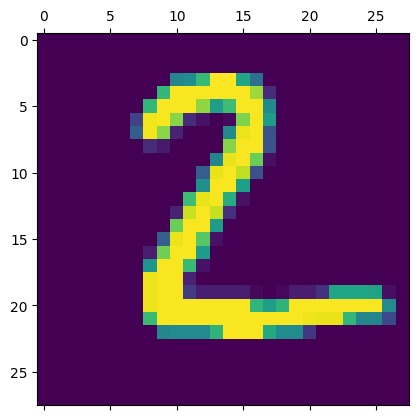

In [73]:
plt.matshow(X_test[1])

In [74]:
y_pred = model.predict(X_test_Flattenned)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([5.3303027e-01, 3.2561352e-03, 9.9957216e-01, 2.7821016e-01,
       6.9851031e-10, 8.5529584e-01, 9.0747917e-01, 1.0469896e-12,
       1.8705188e-01, 3.0167340e-09], dtype=float32)

In [75]:
np.argmax(y_pred[1])

2

In [78]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [77]:
y_predected_label=[np.argmax(i) for i in y_pred]
y_predected_label[:5]

[7, 2, 1, 0, 4]

In [80]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predected_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    6,    3,    1,    0],
       [   0, 1104,    3,    2,    1,    2,    4,    2,   17,    0],
       [   7,    6,  931,   14,    8,    3,   11,   10,   39,    3],
       [   4,    0,   20,  912,    0,   28,    3,   12,   25,    6],
       [   2,    1,    5,    2,  928,    0,    8,    4,   11,   21],
       [  11,    3,    3,   25,   10,  782,   17,    6,   31,    4],
       [   9,    3,    8,    1,    7,   13,  911,    2,    4,    0],
       [   1,    5,   23,    5,    9,    0,    0,  960,    3,   22],
       [   7,    5,    7,   17,    9,   22,    9,   12,  881,    5],
       [  11,    5,    1,   11,   39,    7,    0,   28,   12,  895]])>

Text(95.72222222222221, 0.5, 'Truth')

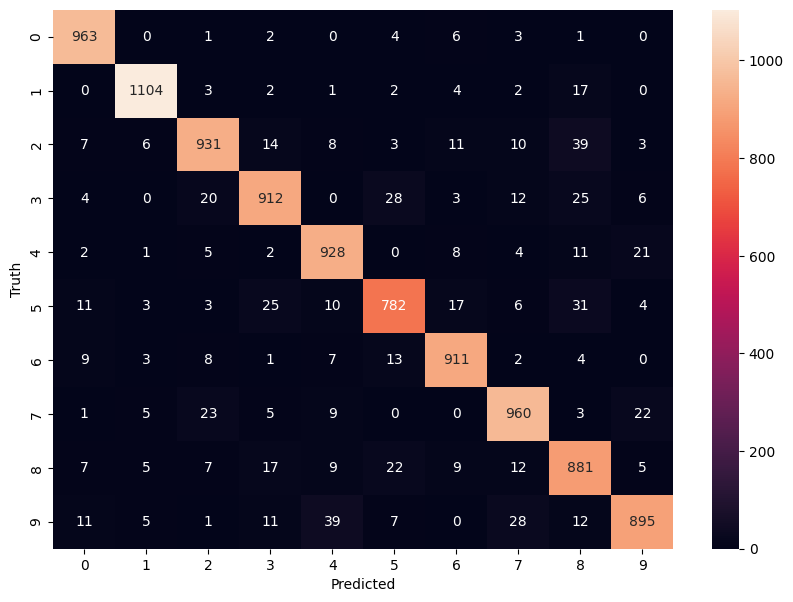

In [81]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Hidden Layer

In [86]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_Flattenned, y_train, epochs=5)

c:\Users\codea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7226 - loss: 0.9230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.3060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9245 - loss: 0.2718
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9306 - loss: 0.2509
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9319 - loss: 0.2383


In [88]:
model.evaluate(X_test_Flattenned, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9218 - loss: 0.2721


[0.24554331600666046, 0.9305999875068665]

Text(95.72222222222221, 0.5, 'Truth')

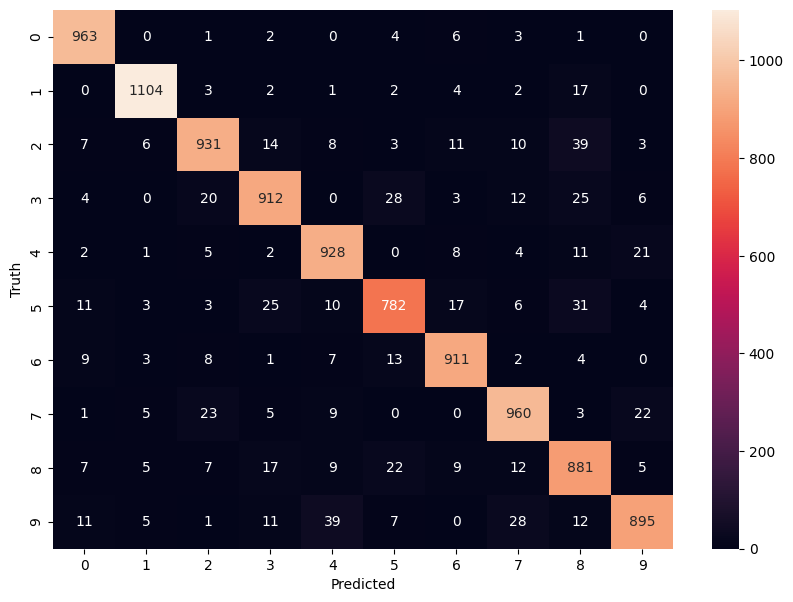

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [93]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,  activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8766 - loss: 0.4464
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9605 - loss: 0.1335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9740 - loss: 0.0917
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0683
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0513
